### Importing Data

In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/wdbc.csv.bz2")
del df['id']
df = df.dropna()
df

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1.1.2) Data Aggregation Statistics

In [43]:
temp = df.drop('diagnosis', axis=1)
temp.agg(['max', 'min', 'var'])

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,fracdim.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
max,28.11000,39.280000,188.50000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.09744,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
min,6.98100,9.710000,43.79000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.04996,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
var,12.41892,18.498909,590.44048,123843.554318,0.000198,0.002789,0.006355,0.001506,0.000752,0.00005,...,23.360224,37.776483,1129.130847,324167.385102,0.000521,0.024755,0.043524,0.004321,0.003828,0.000326


### 1.1.3)
Based on the expected output column, diagonsis, a naive model would base all future decisions on the majority of the current data's values, which can either be M (malignant) or B (benign). Computing this we see that:

In [ ]:
diagnosis = df['diagnosis'].value_counts()
majority = diagnosis[0]
total = diagnosis[0] + diagnosis[1]
accuracy = majority / total
print(diagnosis)
print('Based on the data, the naive model would correctly predict ', accuracy, '% of the cases to be actually benign, or true negatives.')

diagnosis
B    357
M    212
Name: count, dtype: int64
Based on the data, the naive model would correctly predict  0.6274165202108963 % of the cases to be actually benign, or true negatives.


### 1.2)

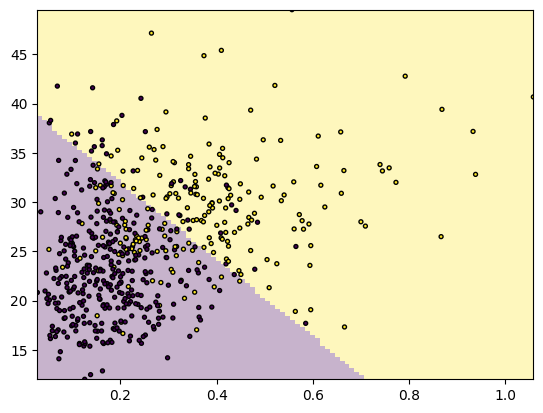

In [ ]:
# i)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
x1 = df["compactness.worst"]
x2 = df["texture.worst"]
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
m = LogisticRegression(solver="lbfgs").fit(X, y)

# ii)
ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

# iii)
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

### 1.2.1)

### a)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x1 = df["texture.mean"]
x2 = df["concpoints.mean"]
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
# Sigma = np.cov(X, rowvar=False) for melahanobis later on
m = KNeighborsClassifier(n_neighbors = 7).fit(X, y)

ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

### b)

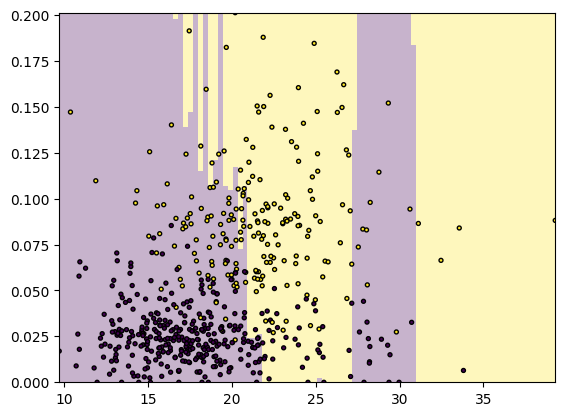

In [ ]:
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

One explanation for the presence of vertical (or horizontal), sharp lines is that the model is overfitting the data to the point where it is adding specific clusters in the form of skinny lines in order to account for data points that are in areas outside of the majority cluster. In reality, this is not what we want as we need to consider some of the more rare cases as outliers, or else we will obtain a model that is overly sensitive to sparse points.

### c)

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(m, X, y, cv = 10)
print("K-NN CV Score:")
print(np.mean(cv))

K-NN CV Score:
0.7114974937343359


### 1.2.2)

### a)

In [ ]:
x1 = df["texture.mean"]
x1 = (x1 - np.mean(x1))/x1.std()
x2 = df["concpoints.mean"]
x2 = (x2 - np.mean(x2))/x2.std()
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
m = KNeighborsClassifier(n_neighbors = 7).fit(X, y)

ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

### b)

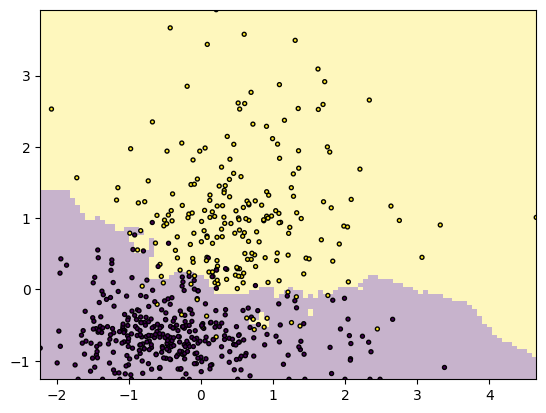

In [ ]:
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

### c)

In [ ]:
cv = cross_val_score(m, X, y, cv = 10)
print("Normalized features K-NN CV Score:")
print(np.mean(cv))

Normalized features K-NN CV Score:
0.9208646616541353


### 1.2.3)
The accuracy appears to be nearly 20% better when using normalized features. Furthermore, there appear to be no more strange or over exaggerated clusters (in the form of skinny lines). This is the main intent of using normalized features, as when we apply this to the overall data we achieve a common scaling for the numerical values without distorting the relative ranges in the values. Hence, we arrive at a prediction and therefore plot that is not as easily swayed by extreme values. Overall, normalized features greatly improved accuracy for this case. 

### 1.2.4)

### a)

In [ ]:
x1 = df["texture.mean"]
x2 = df["concpoints.mean"]
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
Sigma = np.cov(X, rowvar=False)
m = KNeighborsClassifier(n_neighbors = 7, metric = 'mahalanobis', metric_params = {"V":Sigma}).fit(X, y)

ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

### b)

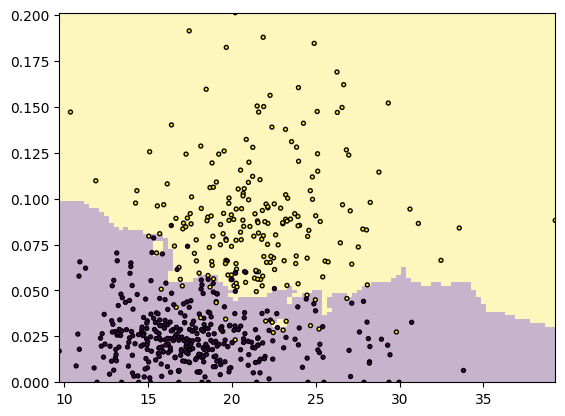

In [ ]:
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

### c)

In [ ]:
cv = cross_val_score(m, X, y, cv = 10)
print("Mahalanobis K-NN CV Score:")
print(np.mean(cv))
# 0.9208646616541353 - norm feat.

Mahalanobis K-NN CV Score:
0.9261278195488721


### 1.2.5)

### Normalized features, compactness & symmetry, 11 neighbors

### a)

In [ ]:
x1 = df["compactness.worst"]
x1 = (x1 - np.mean(x1))/x1.std()
x2 = df["symmetry.mean"]
x2 = (x2 - np.mean(x2))/x2.std()
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
m = KNeighborsClassifier(n_neighbors = 11).fit(X, y)

ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

### b)

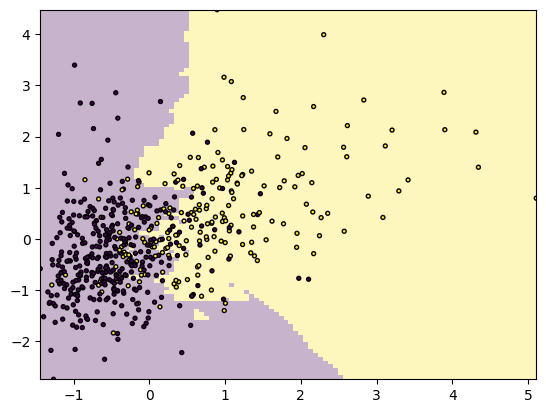

In [ ]:
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

### c)

In [ ]:
cv = cross_val_score(m, X, y, cv = 10)
print("Normalized features (compactness.worst, symmetry.mean) 11 K-NN CV Score:")
print(np.mean(cv))

Normalized features (compactness.worst, symmetry.mean) 11 K-NN CV Score:
0.7785714285714286


### Original Features, symmetry and texture, 7 neighbors

### a)

In [ ]:
x1 = df["symmetry.worst"]
#x1 = (x1 - np.mean(x1))/x1.std()
x2 = df["texture.mean"]
#x2 = (x2 - np.mean(x2))/x2.std()
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
m = KNeighborsClassifier(n_neighbors = 5).fit(X, y)

ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

### b)

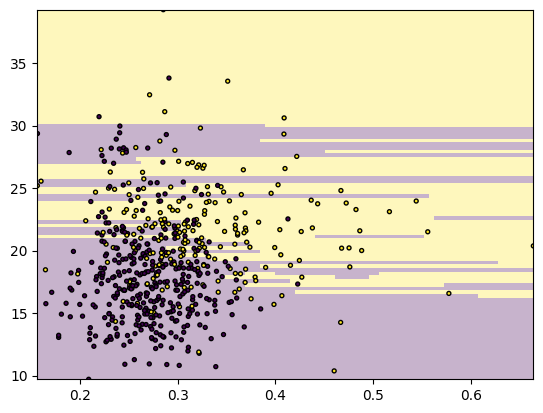

In [ ]:
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

### c)

In [ ]:
cv = cross_val_score(m, X, y, cv = 10)
print("Original features K-NN CV Score:")
print(np.mean(cv))

Original features K-NN CV Score:
0.6762844611528822


### Original Features, symmetry and texture, 5 neighbors, Mahalanobis distance

### a)

In [ ]:
x1 = df["texture.worst"]
x2 = df["symmetry.mean"]
y = df.diagnosis == "M"
X = np.column_stack((x1, x2))
Sigma = np.cov(X, rowvar=False)
m = KNeighborsClassifier(n_neighbors = 5, metric = 'mahalanobis', metric_params = {"V":Sigma}).fit(X, y)

ex1 = np.linspace(x1.min(), x1.max(), 100)
ex2 = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(ex1, ex2)
# 100x100 matrices
g = np.column_stack((xx1.ravel(), xx2.ravel()))
hatY = m.predict(g).reshape(100, 100)

### b)

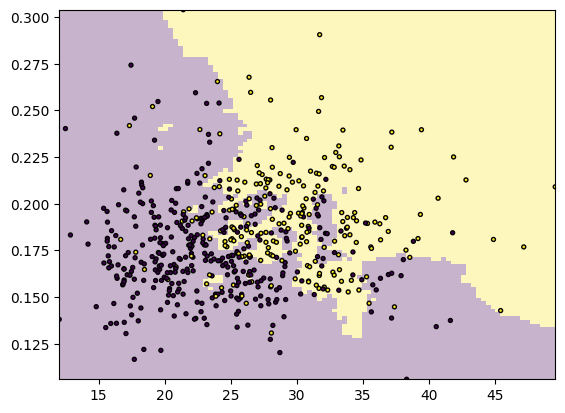

In [ ]:
_ = plt.imshow(hatY, extent=(x1.min(), x1.max(), x2.min(), x2.max()), aspect="auto", interpolation='none', origin='lower', alpha=0.3)
_ = plt.scatter(x1, x2, c=y, edgecolor='k', s=8)
_ = plt.show()

### c)

In [ ]:
cv = cross_val_score(m, X, y, cv = 10)
print("Original features 5 K-NN CV Score Mahalanobis method:")
print(np.mean(cv))

Original features 5 K-NN CV Score Mahalanobis method:
0.7467731829573935


### 1.2.6)
Overall, I noticed that normalized features and Mahalanobis distance worked better than original features, at least when comparing the methods on the same types of two features. Sometimes though, the features themselves would primarily dictate the accuracy, and even normalization and Mahalanobis does not improve accuracy significantly then. Furthermore, normalization and Mahalanobis seemed to be seemingly interchangeable, and often had similar accuracies when correspondingly applied on the same two original features. In regards to the visual impression from the graph, it was clear that the cross validation score matched up, as the worst scores resulted in a graph that had clusters covering points they should not have, decreasing prediction accuracy.

### 2.1)

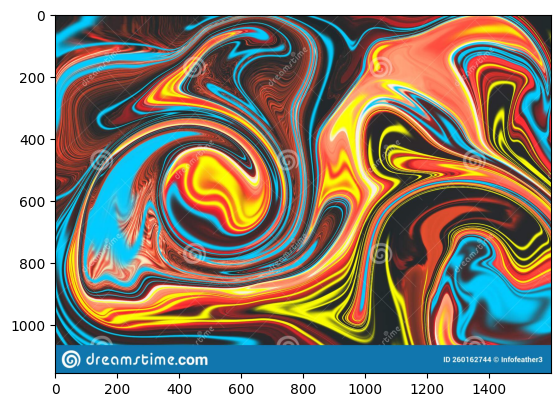

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread("data/liquid_pattern.jpg")
plt.subplot(1,1,1).set_aspect("equal")
_ = plt.imshow(img)
_ = plt.show()

In [ ]:
img.shape

(1156, 1600, 3)

In [ ]:
M = img.reshape((-1, img.shape[2]))
print(M.shape)

(1849600, 3)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
m = KMeans(16).fit(M)
cl = m.predict(M)
centers = m.cluster_centers_
print("Center color values: ", centers)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Center color values:  [[179.37669097  60.48921166  46.61161976]
 [ 21.79085425 124.00987564 171.3583261 ]
 [248.62446336 225.55953334  89.76936137]
 [ 80.43542604  48.38994867  43.93599463]
 [ 14.4928784  196.70185206 240.80531915]
 [ 95.95751283 182.8542615  200.7474639 ]
 [246.70668983 159.76870849 121.84858231]
 [220.19151062 160.88423101  26.39212077]
 [245.84134065 118.68318418  88.48550488]
 [237.8108027  235.29948735 213.01417883]
 [248.28786204 239.3047322   15.39569557]
 [126.28015662  55.7288186   42.68570843]
 [ 50.06059738  88.50982639 102.23817253]
 [239.84013092  71.9311807   53.60871887]
 [ 41.7446243   41.89020444  41.63682122]
 [139.55376333 120.21785203 120.71843955]]


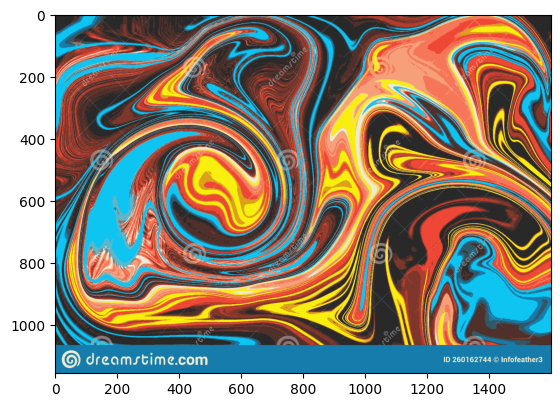

In [ ]:
compressed = centers[cl]/255
compressed = compressed.reshape(img.shape)

plt.subplot(1, 1, 1).set_aspect("equal")
_ = plt.imshow(compressed)
_ = plt.show()

### 2.2)

(a) The shape of the pixels is simply the dimensions of the loaded image, followed by a third dimension representing the RGB color combination.  
(b) The subsequent matrix M is taking the third dimensions of the original image (3) and reshaping it in to a n x 3 matrix, where n is referrenced by -1, implying to make the first dimension whatever number necessary to fit all the original pixels.  
(c) cl values tell us what color any given specific point within the KMean clusters has. This means that cl[12345] = 2 is saying that the 12345th pixel has cluster id of 2.  
(d) The columns of the center color value matrix represent the red, blue, and green of each center of the clusters. They are all from 0 to 255 because 255 takes up exactly one byte of data, this way the RGB color values can precisely be encoded in 8-bit, which is an industry standard. This means that 163.37 translate to some specific shade of red, green, or blue that fall in between 0 to 255.  
(e) There are 16 clusters, each with center colors of a mixture of red, green, blue (3) that all fall between 0 and 255 in brightness. So there are 255 possible center color values, which all can be divided by 255 (as explained above) in order to scale between 0 and 1. 0 representing black and 1 representing white.   

### 2.3)

In [ ]:
def colorReduce(colors):
    m = KMeans(colors).fit(M)
    cl = m.predict(M)
    centers = m.cluster_centers_
    compressed = centers[cl]/255
    compressed = compressed.reshape(img.shape)
    plt.subplot(1, 1, 1).set_aspect("equal")
    _ = plt.imshow(compressed)
    _ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


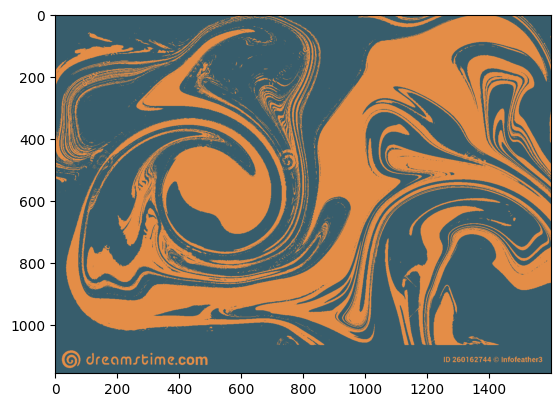

In [ ]:
colorReduce(2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


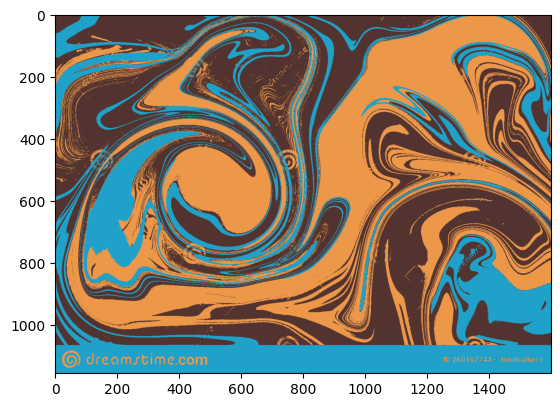

In [ ]:
colorReduce(3)